In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load Meanbrain

In [4]:
file = os.path.join(root_directory,
                    '2019_nov_meanbrain',
                    'meanbrain_final.nii')

meanbrain = bbb.load_numpy_brain(file)

# Reset master spacing

meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 518.76 ms


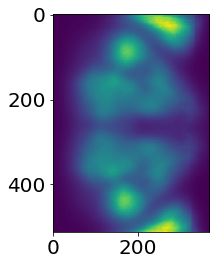

In [5]:
plt.imshow(meanbrain.numpy()[:,:,200])

# Load warped anatomies

In [7]:
folder = os.path.join(root_directory, '20191127_meanbrain_mirror')
brains = [os.path.join(folder,x) for x in os.listdir(folder)]
bbb.sort_nicely(brains)
brains = brains[::-1]
anatomy_mirror = {}

for brain in brains:
    anatomy_mirror[os.path.split(brain)[-1]] = bbb.load_numpy_brain(brain)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 417.42 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 446.84 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 396.41 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 467.35 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 388.38 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 373.83 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 457.20 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 378.96 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 402.48 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 458.80 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 391.25 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 421.88 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 415.73 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 463.61 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 401.8

# Filter warped anatomies by MI

In [99]:
MIs = []
anats = []
for i,anat in enumerate(anatomy):
    #if i == 75:
    #    continue
    fly = anat.split(',')[0]
    MI = anat.split(',')[-1][:-4]
    MIs.append(float(MI))
    anats.append(anat)
    print('{} | {} | {}'.format(i,MI,anat))
    #print(anat)

0 | -0.9512741181510189 | fly_72,anat_0,-0.9512741181510189.nii
1 | -0.83203973336511 | fly_71,anat_0,-0.83203973336511.nii
2 | -0.9436926726458919 | fly_70,anat_0,-0.9436926726458919.nii
3 | -0.6994724824094712 | fly_69,anat_0,-0.6994724824094712.nii
4 | -0.8897889781725999 | fly_68,anat_1,-0.8897889781725999.nii
5 | -0.8748591799352535 | fly_68,anat_0,-0.8748591799352535.nii
6 | -0.9543873452022579 | fly_67,anat_0,-0.9543873452022579.nii
7 | -0.949564054906605 | fly_66,anat_0,-0.949564054906605.nii
8 | -0.8685100506005019 | fly_65,anat_0,-0.8685100506005019.nii
9 | -0.2084208915257777 | fly_64,anat_0,-0.2084208915257777.nii
10 | -0.8543045511336026 | fly_63,anat_1,-0.8543045511336026.nii
11 | -0.725757436928651 | fly_63,anat_0,-0.725757436928651.nii
12 | -0.8896191703477915 | fly_61,anat_0,-0.8896191703477915.nii
13 | -0.9010216201576134 | fly_60,anat_0,-0.9010216201576134.nii
14 | -0.8318876737857676 | fly_59,anat_0,-0.8318876737857676.nii
15 | -0.8585927225372838 | fly_58,anat_0,-0

In [102]:
anats[70]

'fly_6,anat_0,-0.5495137562980302.nii'

In [101]:
MIs_mirror = []
anats_mirror = []
for i,anat in enumerate(anatomy_mirror):
    #if i == 75:
    #    continue
    fly = anat.split(',')[0]
    MI = anat.split(',')[-1][:-4]
    MIs_mirror.append(float(MI))
    anats_mirror.append(anat)
    print('{} | {} | {}'.format(i,MI,anat))
    #print(anat)

0 | -0.9647326299307024 | fly_72,anat_0,-0.9647326299307024.nii
1 | -0.8159396434024567 | fly_71,anat_0,-0.8159396434024567.nii
2 | -1.0241504273825988 | fly_70,anat_0,-1.0241504273825988.nii
3 | -0.6507779494295381 | fly_69,anat_0,-0.6507779494295381.nii
4 | -0.8883886402769648 | fly_68,anat_1,-0.8883886402769648.nii
5 | -0.8502956853526618 | fly_68,anat_0,-0.8502956853526618.nii
6 | -0.9351614483429157 | fly_67,anat_0,-0.9351614483429157.nii
7 | -0.9269781239394915 | fly_66,anat_0,-0.9269781239394915.nii
8 | -0.8667237294527722 | fly_65,anat_0,-0.8667237294527722.nii
9 | -0.21438742389945434 | fly_64,anat_0,-0.21438742389945434.nii
10 | -0.8751932145297813 | fly_63,anat_1,-0.8751932145297813.nii
11 | -0.7416873640357897 | fly_63,anat_0,-0.7416873640357897.nii
12 | -0.9177342880646332 | fly_61,anat_0,-0.9177342880646332.nii
13 | -0.8630028369097528 | fly_60,anat_0,-0.8630028369097528.nii
14 | -0.8301039839913643 | fly_59,anat_0,-0.8301039839913643.nii
15 | -0.8176293398857343 | fly_58

In [173]:
sorted_anats = [i for _,i in sorted(zip(MIs, anats))]

In [ ]:
sorted_anats = [i for _,i in sorted(zip(MIs, anats))]

In [178]:
for i in range(30):
    #print(sorted_anats[i].split(',')[0].split('_')[-1])
    f

12
27
25
23
42
67
72
66
70
13
28
19
3
57
60
22
21
68
61
44
54
68
15
65
58
26
63
56
71
59


In [174]:
sorted_anats

['fly_12,anat_0,-1.0568815836515137.nii',
 'fly_27,anat_0,-1.0463339485834868.nii',
 'fly_25,anat_0,-1.0139240956848858.nii',
 'fly_23,anat_0,-0.9874259887996083.nii',
 'fly_42,anat_0,-0.9582438968388264.nii',
 'fly_67,anat_0,-0.9543873452022579.nii',
 'fly_72,anat_0,-0.9512741181510189.nii',
 'fly_66,anat_0,-0.949564054906605.nii',
 'fly_70,anat_0,-0.9436926726458919.nii',
 'fly_13,anat_0,-0.9337814956770225.nii',
 'fly_28,anat_0,-0.9261876388953293.nii',
 'fly_19,anat_0,-0.9145951467765161.nii',
 'fly_3,anat_0,-0.909153617590632.nii',
 'fly_57,anat_1,-0.9073920244781541.nii',
 'fly_60,anat_0,-0.9010216201576134.nii',
 'fly_22,anat_0,-0.8924629959490065.nii',
 'fly_21,anat_0,-0.89149139481314.nii',
 'fly_68,anat_1,-0.8897889781725999.nii',
 'fly_61,anat_0,-0.8896191703477915.nii',
 'fly_44,anat_0,-0.8878830683178472.nii',
 'fly_54,anat_0,-0.8790695969729562.nii',
 'fly_68,anat_0,-0.8748591799352535.nii',
 'fly_15,anat_0,-0.872845770580663.nii',
 'fly_65,anat_0,-0.8685100506005019.nii'

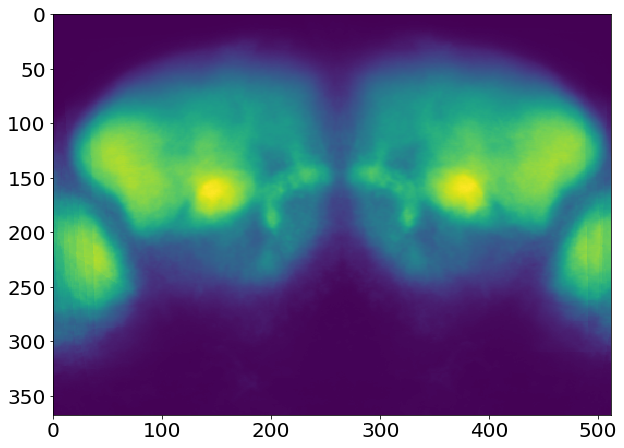

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain[:,:,90].T)

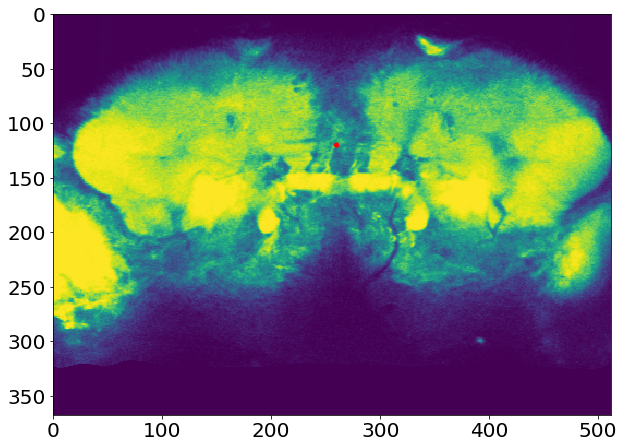

In [50]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(anatomy[sorted_anats[21]][:,:,90].T)
circle = plt.Circle((260, 120), 2, color='r')
ax.add_artist(circle)

In [120]:
good_by_eye = [5,7,14,17,18,22]
#removed 21 because is anat_0 and anat_1

In [95]:
sorted_anats[5]

'fly_67,anat_0,-0.9543873452022579.nii'

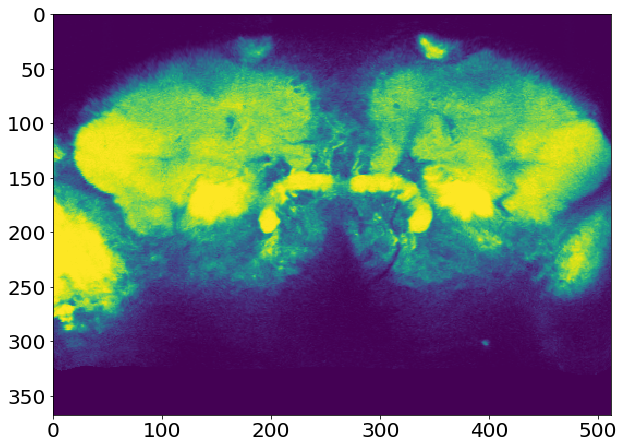

In [118]:
plt.figure(figsize=(10,10))
plt.imshow(anatomy['fly_68,anat_1,-0.8897889781725999.nii'][:,:,90].T)

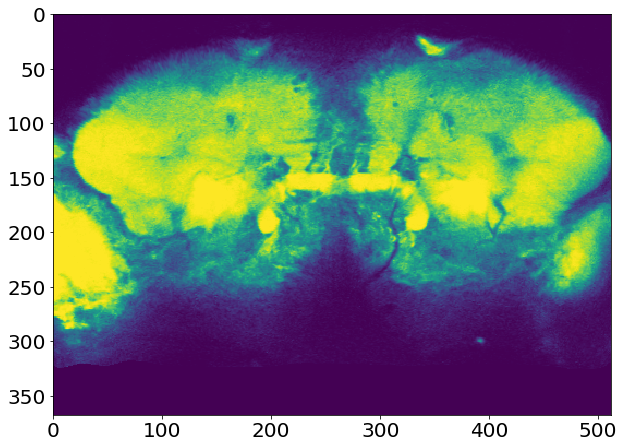

In [119]:
plt.figure(figsize=(10,10))
plt.imshow(anatomy['fly_68,anat_0,-0.8748591799352535.nii'][:,:,90].T)

In [121]:
good_names = []
for i in good_by_eye:
    good_names.append(sorted_anats[i])

In [122]:
good_names

['fly_67,anat_0,-0.9543873452022579.nii',
 'fly_66,anat_0,-0.949564054906605.nii',
 'fly_60,anat_0,-0.9010216201576134.nii',
 'fly_68,anat_1,-0.8897889781725999.nii',
 'fly_61,anat_0,-0.8896191703477915.nii',
 'fly_15,anat_0,-0.872845770580663.nii']

In [124]:
good_names_mirror = ['fly_67,anat_0,-0.9351614483429157.nii',
                     'fly_66,anat_0,-0.9269781239394915.nii',
                     'fly_60,anat_0,-0.8630028369097528.nii',
                     'fly_68,anat_1,-0.8883886402769648.nii',
                     'fly_61,anat_0,-0.9177342880646332.nii',
                     'fly_15,anat_0,-0.8459214626822978.nii']

In [130]:
good = []
for i in good_by_eye:
    good.append(anatomy[sorted_anats[i]])

In [132]:
for i in good_names_mirror:
    good.append(anatomy_mirror[i])

In [133]:
len(good)

12

In [134]:
normalized_brains = []
for brain in good:
    normalized_brains.append(brain/np.mean(brain))

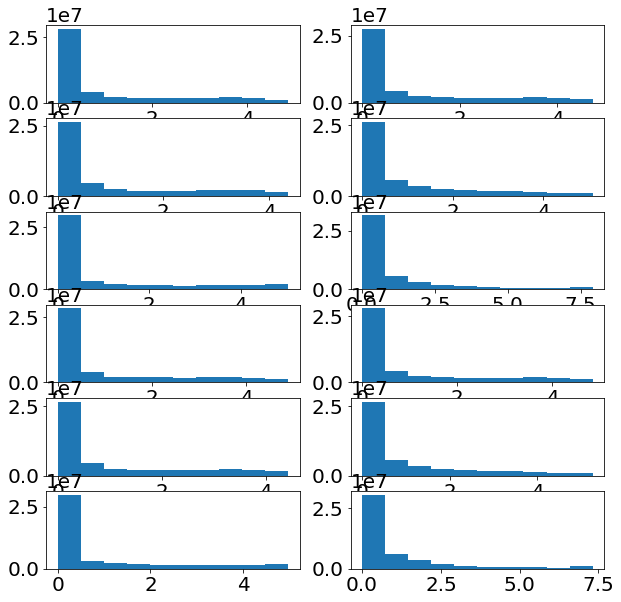

In [139]:
plt.figure(figsize=(10,10))
for i in range(len(normalized_brains)):
    plt.subplot(6,2,i+1)
    plt.hist(normalized_brains[i].flatten());

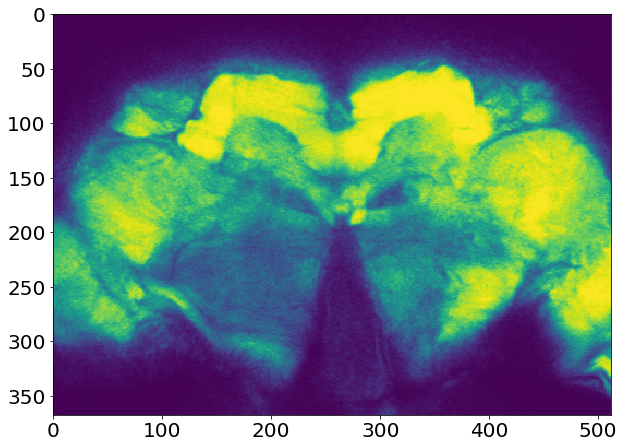

In [135]:
plt.figure(figsize=(10,10))
plt.imshow(normalized_brains[4][:,:,150].T)

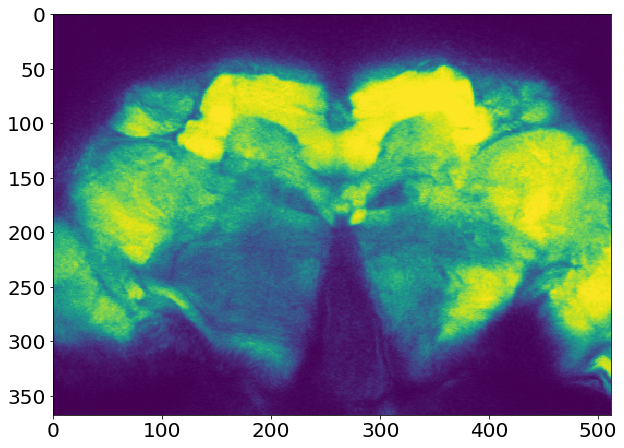

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(good[4][:,:,150].T)

In [149]:
file = os.path.join(root_directory, '20191130_meanbrain', 'meanbrain_syn.nii')
bbb.save_brain(file, new_mean)


~~ save_brain ~~
Current memory usage: 68.58GB
save_brain done. Duration: 2.18 sec


In [147]:
root_directory

'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

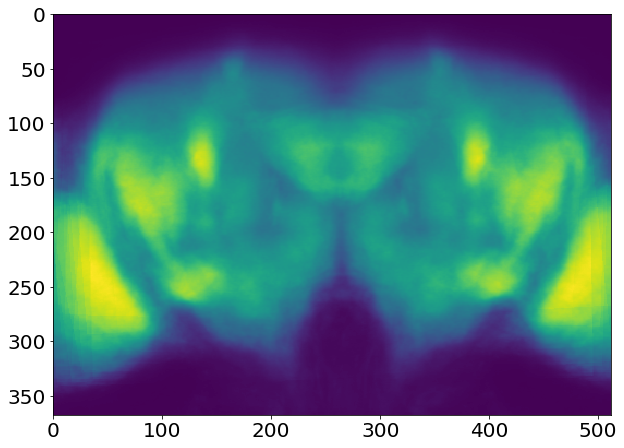

In [169]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain[:,:,120].T)

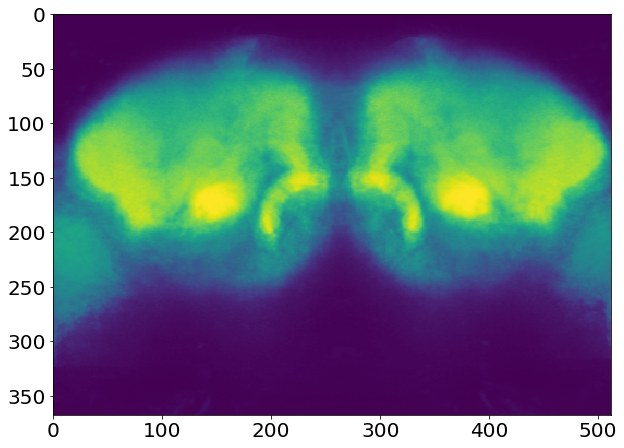

In [172]:
plt.figure(figsize=(10,10))
plt.imshow(new_mean[:,:,90].T)

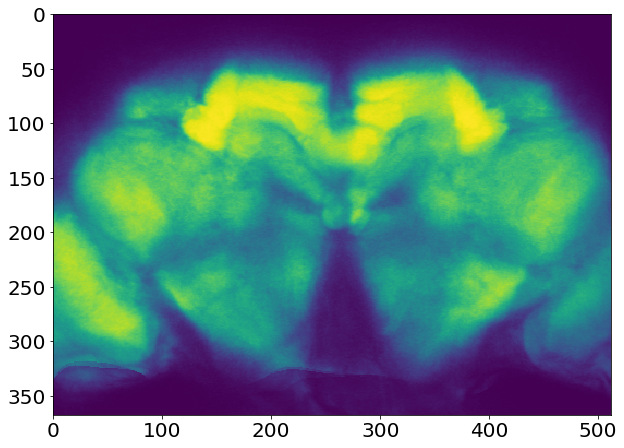

In [253]:
plt.figure(figsize=(10,10))
plt.imshow(new_mean[:,:,150].T)

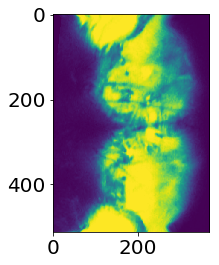

In [216]:
plt.imshow(anatomy[sorted_anats[0]][:,:,100])

In [140]:
temp = np.asarray(normalized_brains)

In [141]:
temp.shape

(12, 512, 368, 251)

In [142]:
new_mean = np.mean(temp,axis=0)

In [143]:
new_mean.shape

(512, 368, 251)

In [167]:
np.shape(good)

(7, 512, 368, 251)

In [ ]:
#note, 22 also good

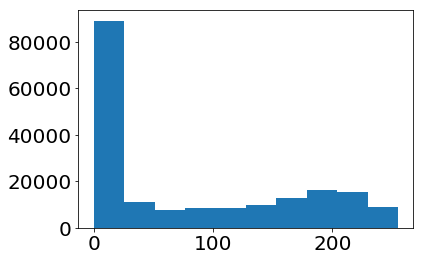

In [199]:
plt.hist(anatomy[sorted_anats[5]][:,:,90].flatten());

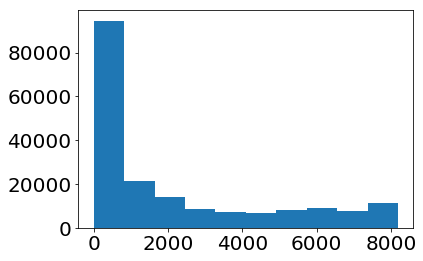

In [84]:
plt.hist(anatomy[sorted_anats[1]][:,:,90].flatten());

In [75]:
sorted_anats

['fly_12,anat_0,-1.0568815836515137.nii',
 'fly_27,anat_0,-1.0463339485834868.nii',
 'fly_25,anat_0,-1.0139240956848858.nii',
 'fly_23,anat_0,-0.9874259887996083.nii',
 'fly_42,anat_0,-0.9582438968388264.nii',
 'fly_67,anat_0,-0.9543873452022579.nii',
 'fly_72,anat_0,-0.9512741181510189.nii',
 'fly_66,anat_0,-0.949564054906605.nii',
 'fly_70,anat_0,-0.9436926726458919.nii',
 'fly_13,anat_0,-0.9337814956770225.nii',
 'fly_28,anat_0,-0.9261876388953293.nii',
 'fly_19,anat_0,-0.9145951467765161.nii',
 'fly_3,anat_0,-0.909153617590632.nii',
 'fly_57,anat_1,-0.9073920244781541.nii',
 'fly_60,anat_0,-0.9010216201576134.nii',
 'fly_22,anat_0,-0.8924629959490065.nii',
 'fly_21,anat_0,-0.89149139481314.nii',
 'fly_68,anat_1,-0.8897889781725999.nii',
 'fly_61,anat_0,-0.8896191703477915.nii',
 'fly_44,anat_0,-0.8878830683178472.nii',
 'fly_54,anat_0,-0.8790695969729562.nii',
 'fly_68,anat_0,-0.8748591799352535.nii',
 'fly_15,anat_0,-0.872845770580663.nii',
 'fly_65,anat_0,-0.8685100506005019.nii'

In [ ]:
X = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
Y = [ 0,   1,   1,    0,   1,   2,   2,   0,   1]

Z = [x for _,x in sorted(zip(Y,X))]
print(Z)  # ["a", "d", "h", "b", "c", "e", "i", "f", "g"]

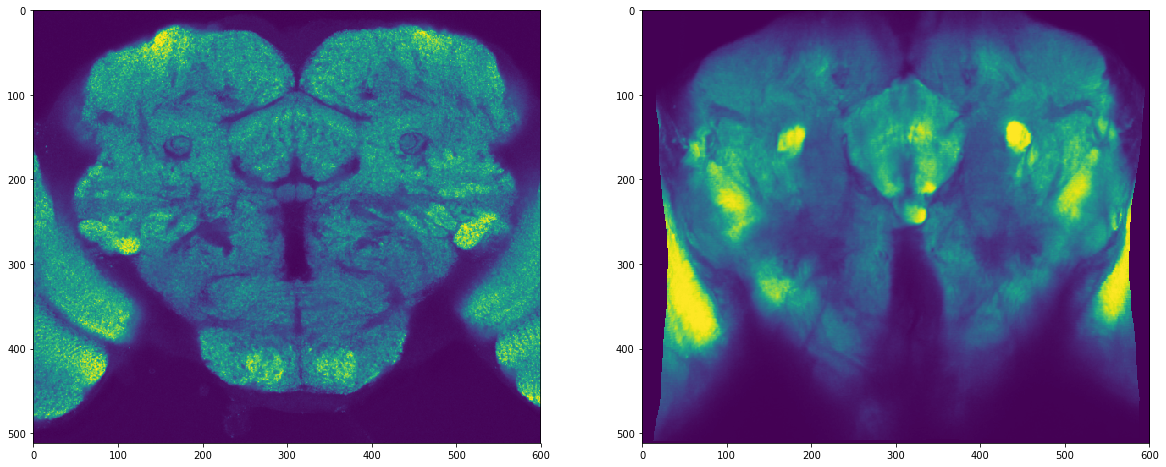

In [71]:
z=100
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(template[:,:,z].T)
plt.subplot(1,2,2)
plt.imshow(anatomy['fly_25,anat_0,-0.4777529070258977.nii'][:,:,z].T)

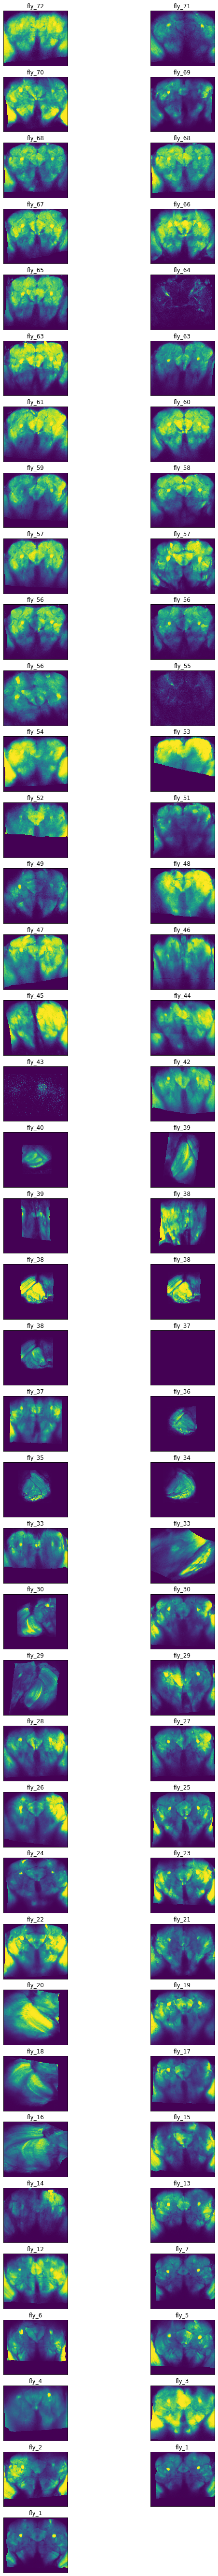

In [72]:
z=100
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,100))
for i,anat in enumerate(anatomy):
    ax = plt.subplot(40,2,i+1)
    ax.imshow(anatomy[anat][:,:,z].T)
    ax.set_title(anat.split(',')[0])
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)

In [ ]:
['']

In [27]:
good = ['fly_3,anat_0,-0.5273990962975492.nii',
        'fly_12,anat_0,-0.580476992504623.nii',
        'fly_19,anat_0,-0.530319268372495.nii',
        'fly_21,anat_0,-0.4993326321597366.nii',
        'fly_25,anat_0,-0.4777529070258977.nii',
        'fly_60,anat_0,-0.5444379538555377.nii',
        'fly_61,anat_0,-0.5315158170963863.nii',
        'fly_67,anat_0,-0.49769135191811725.nii']

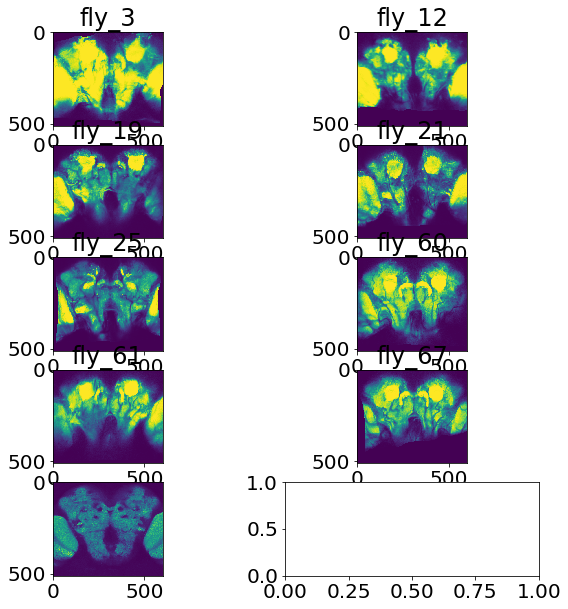

In [42]:
z=50
plt.figure(figsize=(10,10))
for i in range(10):
    ax = plt.subplot(5,2,i+1)
    if i <= 7:
        ax.imshow(anatomy[good[i]][:,:,z].T)
        ax.set_title(good[i].split(',')[0])
    if i == 8:
        ax.imshow(template[:,:,z].T)

In [ ]:
good2 = ['fly_3,anat_0,-0.5273990962975492.nii',
        'fly_25,anat_0,-0.4777529070258977.nii',
        'fly_60,anat_0,-0.5444379538555377.nii',
        'fly_67,anat_0,-0.49769135191811725.nii']

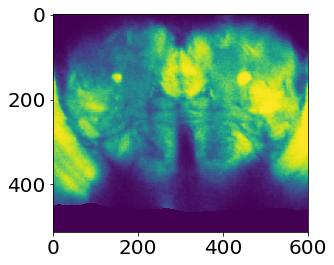

In [26]:
plt.imshow(anatomy['fly_12,anat_0,-0.580476992504623.nii'][:,:,100].T)

In [11]:
for i,anat in enumerate(anatomy):
    print('{}, {}'.format(i, anat))

0, fly_72,anat_0,-0.4630113546969254.nii
1, fly_71,anat_0,-0.3605497879111607.nii
2, fly_70,anat_0,-0.39038430722110024.nii
3, fly_69,anat_0,-0.41041571108566705.nii
4, fly_68,anat_1,-0.44229666429912373.nii
5, fly_68,anat_0,-0.4782108653135713.nii
6, fly_67,anat_0,-0.49769135191811725.nii
7, fly_66,anat_0,-0.45272617907039386.nii
8, fly_65,anat_0,-0.4666523101347667.nii
9, fly_64,anat_0,-0.12587455194648794.nii
10, fly_63,anat_1,-0.4368188879874455.nii
11, fly_63,anat_0,-0.3846051173079424.nii
12, fly_61,anat_0,-0.5315158170963863.nii
13, fly_60,anat_0,-0.5444379538555377.nii
14, fly_59,anat_0,-0.47046190087888073.nii
15, fly_58,anat_0,-0.47912188633301445.nii
16, fly_57,anat_1,-0.4702327753948925.nii
17, fly_57,anat_0,-0.41279455003132626.nii
18, fly_56,anat_2,-0.4661187128915751.nii
19, fly_56,anat_1,-0.3929312864949871.nii
20, fly_56,anat_0,-0.35286548459707695.nii
21, fly_55,anat_0,-0.10041254932594083.nii
22, fly_54,anat_0,-0.42884110967473604.nii
23, fly_53,anat_0,-0.30706793565

fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_7,anat_0 (352, 512, 267)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_6,anat_0 (516, 260, 201)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_5,anat_0 (510, 314, 251)
fly_4,anat_0 (516, 288, 221)
fly_4,anat_0 (516, 288, 221)
fly_4,anat_0 (516, 288, 221)
fly_4,anat_0 (516, 288, 221)
fly_4,anat_0 (

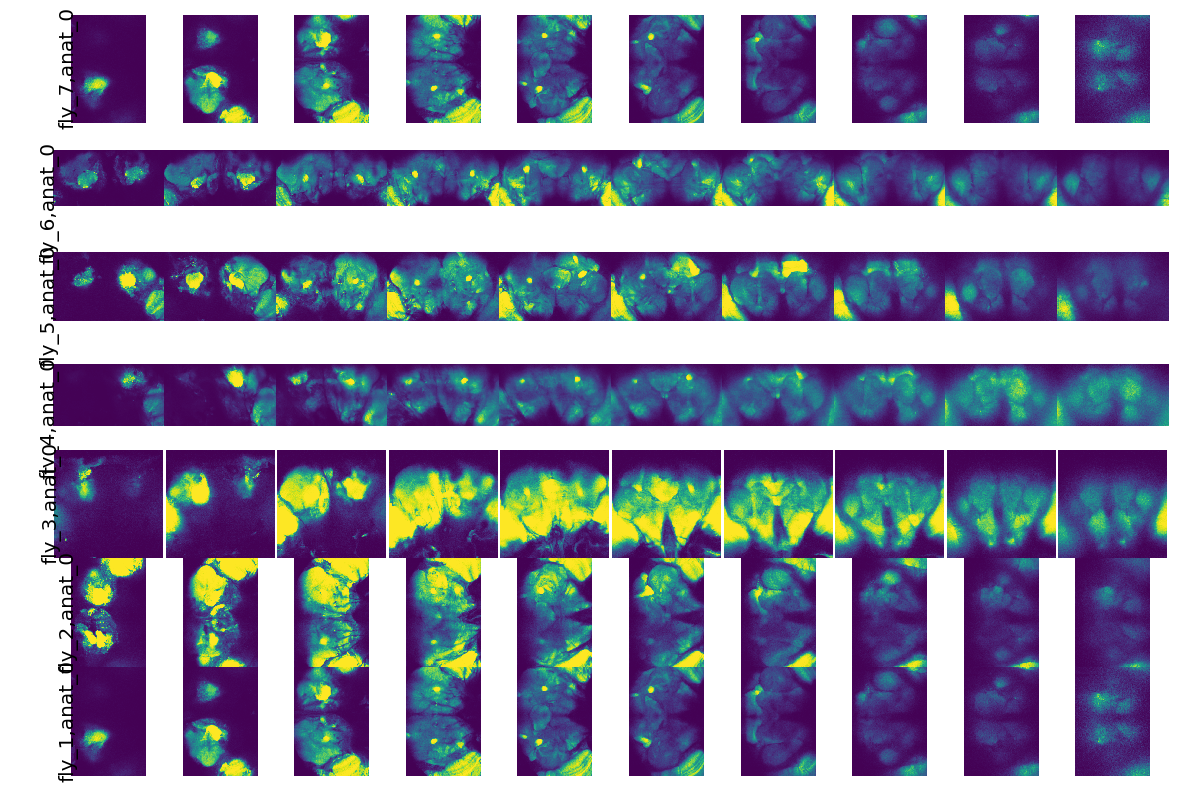

In [17]:
plt.figure(figsize=(20,20))
num_brains = 10
num_slices = 10
i=0
for k,anat in enumerate(anatomy):
    if 70 <= k < 80:
        #print('i: {}'.format(i))
        slices = np.linspace(0,anatomy[anat].shape[-1],10,dtype=int,endpoint=False)
        for j,z in enumerate(slices):
            if anat in ['fly_8,anat_0','fly_9,anat_0']:
                continue
            if j == 1:
                plt.text(-60,30,anat,rotation=90)
            #print('j: {}'.format(j))
            #print('z: {}'.format(z))
            #print('plt num: {}'.format(j+i))
            plt.subplot(num_brains, num_slices, j+(i*10)+1)
            print('{} {}'.format(anat,np.shape(anatomy[anat])))

            plt.imshow(anatomy[anat][:,:,z].T)
            plt.axis('off')
        i+=1
        
plt.subplots_adjust(wspace=0, hspace=0)
fig_folder = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = timestr + '_' + 'anat_8.png'
fname = os.path.join(fig_folder, fname)
plt.savefig(fname,dpi=200,bbox_inches='tight')

### Remove bad brains and non-central brains etc

In [12]:
to_remove = ['fly_64,anat_0',
             'fly_55,anat_0',
             'fly_46,anat_0',
             'fly_45,anat_0',
             'fly_44,anat_0',
             'fly_43,anat_0',
             'fly_40,anat_0',
             'fly_39,anat_0',
             'fly_39,anat_1',
             'fly_38,anat_0_0',
             'fly_38,anat_0_1',
             'fly_38,anat_1_0',
             'fly_38,anat_1_1',
             'fly_37,anat_2',
             'fly_36,anat_0',
             'fly_35,anat_0',
             'fly_34,anat_0',
             'fly_33,anat_0',
             'fly_30,anat_1',
             'fly_29,anat_1',
             'fly_20,anat_0',
             'fly_18,anat_0',
             'fly_16,anat_0',
             'fly_12,anat_0',
             'fly_10,anat_0',
             'fly_9,anat_0',
             'fly_8,anat_0']

In [13]:
for k in to_remove:
    anatomy.pop(k, None)

In [14]:
anatomy.keys()

dict_keys(['fly_72,anat_0', 'fly_71,anat_0', 'fly_70,anat_0', 'fly_69,anat_0', 'fly_68,anat_1', 'fly_68,anat_0', 'fly_67,anat_0', 'fly_66,anat_0', 'fly_65,anat_0', 'fly_63,anat_1', 'fly_63,anat_0', 'fly_61,anat_0', 'fly_60,anat_0', 'fly_59,anat_0', 'fly_58,anat_0', 'fly_57,anat_1', 'fly_57,anat_0', 'fly_56,anat_1', 'fly_56,anat_0', 'fly_56,anat_2', 'fly_54,anat_0', 'fly_53,anat_0', 'fly_52,anat_0', 'fly_51,anat_0', 'fly_49,anat_0', 'fly_48,anat_0', 'fly_47,anat_0', 'fly_42,anat_0', 'fly_37,anat_0', 'fly_33,anat_1', 'fly_30,anat_0', 'fly_29,anat_0', 'fly_28,anat_0', 'fly_27,anat_0', 'fly_26,anat_0', 'fly_25,anat_0', 'fly_24,anat_0', 'fly_23,anat_0', 'fly_22,anat_0', 'fly_21,anat_0', 'fly_19,anat_0', 'fly_17,anat_0', 'fly_15,anat_0', 'fly_14,anat_0', 'fly_13,anat_0', 'fly_7,anat_0', 'fly_6,anat_0', 'fly_5,anat_0', 'fly_4,anat_0', 'fly_3,anat_0', 'fly_2,anat_0', 'fly_1,anat_0'])

### Rotate some brains to match

In [15]:
to_rotate = ['fly_7,anat_0', 'fly_2,anat_0', 'fly_1,anat_0']
for k in to_rotate:
    anatomy[k] = np.swapaxes(anatomy[k],0,1)

### Create Ants brains with correct pixel sizes

In [16]:
anatomy_ants = {}
for anat in anatomy:
    fly_num, anat_num = anat.split(',')
    anatomy_xml = os.path.join(root_directory, fly_num, anat_num, 'anatomy.xml')
    anatomy_ants[anat] = ants.from_numpy(anatomy[anat])
    anatomy_ants[anat].set_spacing(bbb.get_resolution(anatomy_xml))
    print('DONE: {}'.format(anat))

DONE: fly_72,anat_0
DONE: fly_71,anat_0
DONE: fly_70,anat_0
DONE: fly_69,anat_0
DONE: fly_68,anat_1
DONE: fly_68,anat_0
DONE: fly_67,anat_0
DONE: fly_66,anat_0
DONE: fly_65,anat_0
DONE: fly_63,anat_1
DONE: fly_63,anat_0
DONE: fly_61,anat_0
DONE: fly_60,anat_0
DONE: fly_59,anat_0
DONE: fly_58,anat_0
DONE: fly_57,anat_1
DONE: fly_57,anat_0
DONE: fly_56,anat_1
DONE: fly_56,anat_0
DONE: fly_56,anat_2
DONE: fly_54,anat_0
DONE: fly_53,anat_0
DONE: fly_52,anat_0
DONE: fly_51,anat_0
DONE: fly_49,anat_0
DONE: fly_48,anat_0
DONE: fly_47,anat_0
DONE: fly_42,anat_0
DONE: fly_37,anat_0
DONE: fly_33,anat_1
DONE: fly_30,anat_0
DONE: fly_29,anat_0
DONE: fly_28,anat_0
DONE: fly_27,anat_0
DONE: fly_26,anat_0
DONE: fly_25,anat_0
DONE: fly_24,anat_0
DONE: fly_23,anat_0
DONE: fly_22,anat_0
DONE: fly_21,anat_0
DONE: fly_19,anat_0
DONE: fly_17,anat_0
DONE: fly_15,anat_0
DONE: fly_14,anat_0
DONE: fly_13,anat_0
DONE: fly_7,anat_0
DONE: fly_6,anat_0
DONE: fly_5,anat_0
DONE: fly_4,anat_0
DONE: fly_3,anat_0
DONE:

In [31]:
slave = ants.n4_bias_field_correction(anatomy_ants['fly_25,anat_0'])

In [51]:
master = template
anatomy2template = {}
MI_before = {}
MI_after = {}

grad_steps = 0.2
flow_sigma = 10
total_sigma = 0
aff_sampling = 32
syn_sampling = 256
verbose = True

for grad_steps in [.05]:
    print('Working on {}'.format(anat))
    t0 = time.time()
    slave2master = ants.registration(master,
                                     slave,
                                     type_of_transform='SyN',
                                     syn_sampling=syn_sampling,
                                     flow_sigma=flow_sigma,
                                     total_sigma=total_sigma,
                                     grad_steps=grad_steps)
    anatomy2template[grad_steps] = slave2master
    #MI_after[anat] = ants.image_mutual_information(master,slave2master['warpedmovout'])
    print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

Working on fly_25,anat_0
COMPLETE. Duration: 363 sec


In [52]:
#folder = os.path.join(root_directory, '2019_nov_meanbrain_2')
#os.mkdir(folder)

for brain in anatomy2template:
    file = os.path.join(folder, 'grad_steps_{}.nii'.format(brain))
    bbb.save_brain(file, anatomy2template[brain]['warpedmovout'].numpy())


~~ save_brain ~~
Current memory usage: 33.27GB
save_brain done. Duration: 1.04 sec


In [17]:
master = template
anatomy2template = {}
MI_before = {}
MI_after = {}

for anat in ['fly_25,anat_0']:#anatomy_ants:
    print('Working on {}'.format(anat))
    t0 = time.time()
    slave = anatomy_ants[anat]
    #MI_before[anat] = ants.image_mutual_information(master,slave)
    slave2master = ants.registration(master,
                                     slave,
                                     type_of_transform='SyN')
    anatomy2template[anat] = slave2master#['warpedmovout']
    MI_after[anat] = ants.image_mutual_information(master,slave2master['warpedmovout'])
    print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

Working on fly_25,anat_0
COMPLETE. Duration: 325 sec


In [29]:
MI_after['fly_25,anat_0']

-0.5780067595028602

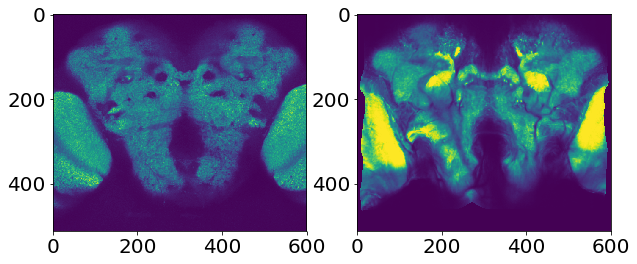

In [30]:
z = 50

plt.figure(figsize=(10,20))
ax1 = plt.subplot(121)
ax1.imshow(template.numpy()[:,:,z].T)
ax2 = plt.subplot(122)
ax2.imshow(anatomy2template['fly_25,anat_0']['warpedmovout'].numpy()[:,:,z].T)

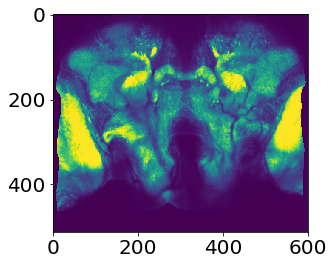

In [22]:
plt.imshow(anatomy2template['fly_25,anat_0']['warpedmovout'].numpy()[:,:,50].T)

### Save first round of alignment

In [28]:
#folder = os.path.join(root_directory, '2019_nov_meanbrain_2')
#os.mkdir(folder)

#for anat in anatomy2template:
file = os.path.join(folder, 'template_trim.nii')
bbb.save_brain(file, template.numpy())
#print('SAVED: {}'.format(anat))


~~ save_brain ~~
Current memory usage: 30.07GB
save_brain done. Duration: 932.98 ms


In [131]:
file = os.path.join(root_directory,
                   '2019_nov_meanbrain',
                   'affine_rnd1',
                   'mutual_info_after.npy')
np.save(file, MI_after)

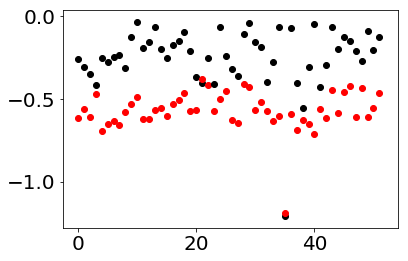

In [98]:
for i,anat in enumerate(MI_before):
    plt.scatter(i, MI_before[anat],color='k')
    plt.scatter(i, MI_after[anat],color='r')

### Average all aligned brains

In [99]:
brain_matrix = []
for anat in anatomy_affine_rnd1:
    brain_matrix.append(anatomy_affine_rnd1[anat].numpy())

In [107]:
medianbrain = np.median(brain_matrix,axis=0)

In [108]:
file = os.path.join(root_directory, '2019_nov_meanbrain', 'medianbrain_rnd1.nii')
bbb.save_brain(file, medianbrain)
#meanbrain


~~ save_brain ~~
Current memory usage: 52.04GB
save_brain done. Duration: 2.35 sec


In [123]:
meanbrain_smoothed = gaussian_filter(meanbrain, sigma=3)

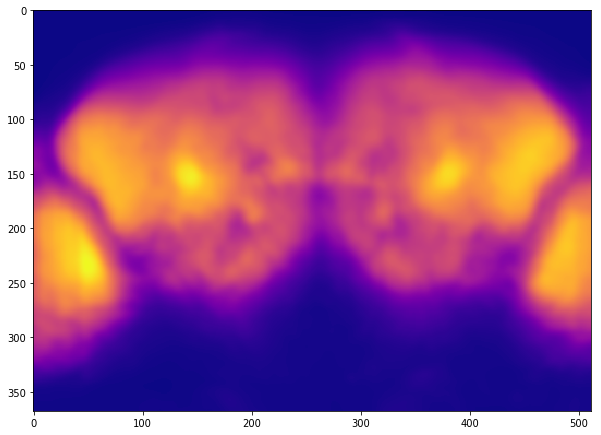

In [124]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain_smoothed[:,:,100].T,cmap='plasma')

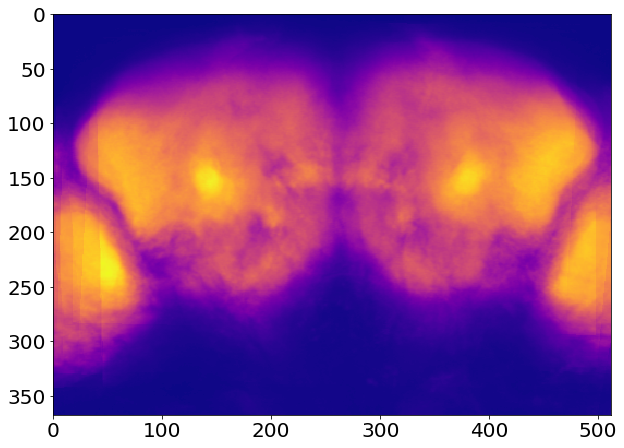

In [111]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain_smoothed[:,:,100].T,cmap='plasma')